In [1]:
#安装库
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
# gensim用来加载预训练word vector
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings("ignore")
import bz2

In [2]:
# 解压词向量
with open("sgns.zhihu.bigram", 'wb') as new_file, open("sgns.zhihu.bigram.bz2", 'rb') as file:
    decompressor = bz2.BZ2Decompressor()
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(decompressor.decompress(data))

0

0

899743

0

0

899732

0

0

899741

0

0

899711

0

0

899773

0

0

899745

0

0

899715

0

0

899737

0

0

899744

0

0

899733

0

0

899720

0

0

899718

0

0

899725

0

0

899734

0

0

899711

0

0

899724

0

0

899748

0

0

899730

0

0

899751

0

0

899741

0

0

899767

0

0

899749

0

0

899729

0

0

899713

0

0

899719

0

0

899746

0

0

899731

0

0

899726

0

0

899708

0

0

899739

0

0

899752

0

0

899729

0

0

899720

0

0

899738

0

0

899741

0

0

899725

0

0

899754

0

0

899734

0

0

899729

0

0

899732

0

899740

0

0

899767

0

0

899722

0

0

899735

0

0

899730

0

0

899729

0

0

899724

0

0

899746

0

0

899747

0

0

899740

0

0

899748

0

0

899763

0

0

899722

0

0

899725

0

0

899733

0

0

899729

0

0

899725

0

0

899735

0

0

899734

0

0

899734

0

899729

0

0

899717

0

0

899726

0

0

899746

0

0

899751

0

0

899739

0

0

899728

0

0

899741

0

0

899742

0

0

899723

0

0

899739

0

0

899755

0

0

899744

0

0

899729

0

0

899746

0

0

899716

0

0

899757

0

899742

0

0

899755

0

0

899731

0

0

899729

0

0

899728

0

0

899733

0

0

899747

0

0

899742

0

0

899755

0

0

899725

0

0

899712

0

0

899702

0

0

899760

0

0

899746

0

899765

0

0

899736

0

0

899754

0

0

899735

0

0

899740

0

0

899748

0

0

899746

0

0

899727

0

0

899743

0

0

899736

0

0

899707

0

0

899738

0

0

899710

0

899738

0

0

899736

0

0

899712

0

0

899746

0

0

899727

0

0

899741

0

0

899742

0

0

899723

0

0

899714

0

0

899716

0

0

899768

0

0

899723

0

899746

0

0

899699

0

0

899760

0

0

899725

0

0

899728

0

0

899731

0

0

899786

0

0

899740

0

0

899732

0

0

899738

0

0

899760

0

0

899720

0

899782

0

0

899759

0

0

899724

0

0

899712

0

0

899732

0

0

899728

0

0

899738

0

0

899729

0

0

899752

0

0

899729

0

0

899751

0

899734

0

0

899722

0

0

899742

0

0

899716

0

0

899735

0

0

899734

0

0

899775

0

0

899751

0

0

899733

0

0

899774

0

0

899722

0

899765

0

0

899741

0

0

899755

0

0

899717

0

0

899744

0

0

899724

0

0

899714

0

0

899716

0

0

899779

0

0

899758

0

0

899742

0

899743

0

0

899757

0

0

899779

0

0

899796

0

0

899750

0

0

899745

0

0

899744

0

0

899780

0

0

899762

0

0

899737

0

899754

0

0

899731

0

0

899731

0

0

899733

0

0

899761

0

0

899781

0

0

899755

0

0

899804

0

0

899750

0

899782

0

0

899724

0

0

899758

0

0

899744

0

0

899739

0

0

899730

0

0

899838

0

0

899813

0

0

899745

0

899733

0

0

899756

0

0

899777

0

0

899704

0

0

899742

0

0

899768

0

0

899737

0

0

899789

0

0

899716

0

899774

0

0

899797

0

0

899742

0

0

899762

0

0

899750

0

0

899764

0

0

899754

0

0

899802

0

0

899798

0

899745

0

0

899750

0

0

899742

0

0

899747

0

0

899719

0

0

899802

0

0

899751

0

0

899773

0

899729

0

0

899705

0

0

899736

0

0

899740

0

0

899725

0

0

899746

0

0

899737

0

0

899716

0

899750

0

0

899772

0

0

899727

0

0

899730

0

0

899744

0

0

899746

0

0

899729

0

0

899738

0

899712

0

0

899735

0

0

899735

0

0

899733

0

0

899718

0

0

899750

0

0

899751

0

0

899724

0

899764

0

0

899794

0

0

899744

0

0

899720

0

0

899716

0

0

899737

0

0

899773

0

0

899733

0

899731

0

0

899744

0

0

899743

0

0

899722

0

0

899734

0

0

899757

0

0

899721

0

0

899785

0

899726

0

0

899729

0

0

899803

0

0

899751

0

0

899754

0

0

899769

0

0

899710

0

0

899746

0

899714

0

0

899733

0

0

899740

0

0

899749

0

0

899716

0

0

899775

0

0

899744

0

899729

0

0

899777

0

0

899737

0

0

899722

0

0

899712

0

0

899729

0

0

899747

0

0

899768

0

899704

0

0

899762

0

0

899759

0

0

899742

0

0

899734

0

0

899712

0

899716

0

0

899709

0

0

899695

0

0

899734

0

0

899725

0

0

899724

0

0

899730

0

899725

0

0

899731

0

0

899704

0

0

899732

0

0

899729

0

0

899719

0

0

899713

0

899740

0

0

899728

0

0

899734

0

0

899760

0

0

899741

0

0

899710

0

0

899717

0

899699

0

0

899735

0

0

899762

0

0

899733

0

0

899759

0

0

899729

0

899727

0

0

899722

0

0

899715

0

0

899739

0

0

899722

0

0

899748

0

0

899730

0

899743

0

0

899747

0

0

899743

0

0

899721

0

0

899734

0

0

899738

0

899721

0

0

899727

0

0

899737

0

0

899744

0

0

899736

0

0

899726

0

899759

0

0

899726

0

0

899694

0

0

899702

0

0

899699

0

0

899757

0

899713

0

0

899781

0

0

899742

0

0

899724

0

0

899742

0

0

899737

0

0

899758

0

899734

0

0

899721

0

0

899762

0

0

899745

0

0

899747

0

0

899725

0

899739

0

0

899801

0

0

899742

0

0

899736

0

0

899726

0

0

899735

0

899753

0

0

899784

0

0

899711

0

0

899695

0

0

899731

0

899717

0

0

899736

0

0

899708

0

0

899739

0

0

899708

0

0

899738

0

899736

0

0

899721

0

0

899732

0

0

899718

0

0

899725

0

0

899747

0

899738

0

0

899735

0

0

899738

0

0

899744

0

0

899771

0

0

899752

0

899749

0

0

899733

0

0

899715

0

0

899736

0

0

899722

0

899747

0

0

899746

0

0

899795

0

0

899741

0

0

899761

0

0

899697

0

899751

0

0

899798

0

0

899744

0

0

899751

0

0

899749

0

0

899746

0

899734

0

0

899749

0

0

899711

0

0

899774

0

0

899722

0

899733

0

0

899779

0

0

899725

0

0

899801

0

0

899755

0

899724

0

0

899720

0

0

899710

0

0

899710

0

0

899717

0

0

899724

0

899725

0

0

899732

0

0

899731

0

0

899694

0

0

899715

0

899722

0

0

899734

0

0

899715

0

0

899713

0

0

899725

0

899717

0

0

899737

0

0

899691

0

0

899729

0

0

899724

0

0

899713

0

899716

0

0

899723

0

0

899734

0

0

899728

0

0

899714

0

899709

0

0

899721

0

0

899737

0

0

899738

0

0

899727

0

899734

0

0

899752

0

0

899709

0

0

899711

0

0

899749

0

899702

0

0

899730

0

0

899713

0

0

899752

0

0

899746

0

899732

0

0

899735

0

0

899743

0

0

899725

0

0

899757

0

899727

0

0

899738

0

0

899731

0

0

899743

0

0

899688

0

899729

0

0

899728

0

0

899744

0

0

899722

0

0

899706

0

899709

0

0

899729

0

0

899726

0

0

899749

0

0

899719

0

899736

0

0

899726

0

0

899678

0

0

899759

0

0

899759

0

899709

0

0

899718

0

0

899711

0

0

899741

0

0

899726

0

899737

0

0

899726

0

0

899751

0

0

899713

0

899748

0

0

899756

0

0

899761

0

0

899722

0

0

899764

0

899755

0

0

899735

0

0

899720

0

0

899804

0

0

899748

0

899736

0

0

899691

0

0

899678

0

0

899769

0

0

899712

0

899754

0

0

899707

0

0

899724

0

0

899730

0

899724

0

0

899735

0

0

899721

0

0

899678

0

0

899741

0

899726

0

0

899707

0

0

899738

0

0

899709

0

0

899752

0

899818

0

0

899712

0

0

899736

0

0

899718

0

899707

0

0

899742

0

0

899727

0

0

899716

0

0

899748

0

899710

0

0

899829

0

0

899749

0

0

899709

0

899715

0

0

899705

0

0

899718

0

0

899741

0

0

899711

0

899700

0

0

899709

0

0

899725

0

0

899737

0

899747

0

0

899700

0

0

899703

0

0

899725

0

0

899726

0

899724

0

0

899754

0

0

899710

0

0

899706

0

899754

0

0

899733

0

0

899740

0

0

899750

0

0

899747

0

899745

0

0

899757

0

0

899714

0

0

899721

0

899797

0

0

899699

0

0

899726

0

0

899711

0

0

899779

0

899710

0

0

899709

0

0

899707

0

0

899729

0

899731

0

0

899700

0

0

899703

0

0

899806

0

899721

0

0

899717

0

0

899823

0

0

899718

0

899716

0

0

899745

0

0

899751

0

0

899727

0

0

899721

0

899725

0

0

899705

0

0

899680

0

0

899706

0

899685

0

0

899735

0

0

899807

0

0

899724

0

899800

0

0

899730

0

0

899702

0

0

899738

0

899774

0

0

899743

0

0

899767

0

0

899727

0

0

899682

0

899711

0

0

899740

0

0

899737

0

0

899745

0

899729

0

0

899731

0

0

899726

0

0

899714

0

899721

0

0

899743

0

0

899751

0

0

899724

0

899797

0

0

899744

0

0

899752

0

0

899725

0

899721

0

0

899693

0

0

899700

0

0

899740

0

899730

0

0

899716

0

0

899721

0

0

899724

0

899702

0

0

899720

0

0

899735

0

0

899733

0

899789

0

0

899723

0

0

899716

0

0

899725

0

899741

0

0

899744

0

0

899707

0

0

899719

0

899729

0

0

899716

0

0

899714

0

0

899708

0

899722

0

0

899725

0

0

899716

0

0

899679

0

899721

0

0

899710

0

0

899730

0

0

899782

0

899697

0

0

899714

0

0

899721

0

0

899720

0

899711

0

0

899729

0

0

899716

0

0

899696

0

899719

0

0

899755

0

0

899725

0

0

899718

0

899819

0

0

899821

0

0

899712

0

0

899715

0

899716

0

0

899709

0

0

899715

0

0

899726

0

899718

0

0

899724

0

0

899690

0

0

899737

0

899706

0

0

899698

0

0

899686

0

899706

0

0

899721

0

0

899729

0

0

899706

0

899697

0

0

899713

0

0

899730

0

0

899701

0

899739

0

0

899725

0

0

899709

0

0

899719

0

899746

0

0

899744

0

0

899723

0

899743

0

0

899791

0

0

899695

0

0

899719

0

899706

0

0

899728

0

0

899719

0

0

899907

0

899721

0

0

899700

0

0

899727

0

0

899706

0

899706

0

0

899700

0

0

899714

0

899695

0

0

899729

0

0

899730

0

0

899810

0

899733

0

0

899742

0

0

899744

0

0

899750

0

899694

0

0

899709

0

0

899734

0

899724

0

0

899716

0

0

899760

0

0

899724

0

899681

0

0

899781

0

0

899680

0

899735

0

0

899790

0

0

899717

0

0

899775

0

899683

0

0

899723

0

0

899771

0

899730

0

0

899713

0

0

899679

0

0

899699

0

899710

0

0

899723

0

0

899817

0

0

899712

0

899712

0

0

899709

0

0

899716

0

899701

0

0

899771

0

0

899708

0

0

899781

0

899748

0

0

899707

0

0

899723

0

899713

0

0

899728

0

0

899689

0

899727

0

0

899723

0

0

899741

0

0

899712

0

899714

0

0

899810

0

0

899717

0

899737

0

0

899765

0

0

899726

0

0

899719

0

899732

0

0

899749

0

0

899713

0

899716

0

0

899756

0

0

899721

0

0

899742

0

899714

0

0

899732

0

0

899826

0

899694

0

0

899720

0

0

899721

0

899726

0

0

899712

0

0

899696

0

0

899700

0

899744

0

0

899704

0

0

899801

0

899828

0

0

899756

0

0

899805

0

899712

0

0

899699

0

0

899808

0

899721

0

0

899805

0

0

899760

0

0

899831

0

899671

0

0

899804

0

0

899711

0

899722

0

0

899916

0

0

899783

0

899716

0

0

899701

0

0

899771

0

899725

0

0

899903

0

0

899715

0

899768

0

0

899830

0

0

899724

0

0

899727

0

899711

0

0

899779

0

0

899857

0

899726

0

0

899826

0

0

899741

0

899842

0

0

899724

0

0

899858

0

899816

0

0

899994

0

0

899755

0

899799

0

0

899704

0

0

899828

0

899723

0

0

899896

0

0

899763

0

899903

0

0

899943

0

899997

0

0

900062

0

0

900407

0

900685

0

0

901283

0

835288

In [3]:
# 使用gensim加载预训练中文分词

cn_model = KeyedVectors.load_word2vec_format('sgns.zhihu.bigram',
                                             binary=False, unicode_errors="ignore")

In [4]:
# embedding_dim
# 每一个词都对应一个长度为300的向量
embedding_dim = cn_model['山东大学'].shape[0]#一词山东大学，shape[0]返回行数
print('词向量的长度为{}'.format(embedding_dim))
#cn_model['新能源']
print("embedding_dim:", embedding_dim)

词向量的长度为300
embedding_dim: 300


In [5]:
#自己添的
#计算相似度
cn_model.similarity('明黄','鹅黄')

0.8881516

In [6]:
# #找出最相近的词，余弦相似度
# cn_model.most_similar(positive=['汽车'],topn=10)

In [7]:
#找出不同的词
test_words='老师 会计师 程序员 律师 医生 老人'
test_words_result=cn_model.doesnt_match(test_words.split())
print('在'+test_words+'中:\n不是同一类别的词为：%s'%test_words_result)

在老师 会计师 程序员 律师 医生 老人中:
不是同一类别的词为：老人


In [8]:
import pandas as pd

train_texts_orig = []
# # 文本所对应的labels, 也就是标记
train_target = []

# 导入数据
data_num = pd.read_excel(r'/Users/17433/Desktop/毕业设计/新太平洋数据/太平洋数据.xlsx',sheet_name="优缺训练集")
# 将数据转换为二元的列表
train_texts_orig = list(data_num['评论内容'])

In [9]:
# 我们使用tensorflow的keras接口来建模
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional,Dropout#Dense全连接
#Bidirectional双向LSTM callbacks从来调参
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.optimizer_v2 import rmsprop
from tensorflow.python.keras.optimizer_v2 import adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [10]:
# 进行分词和tokenize
# train_tokens是一个长长的list，其中含有4000个小list，对应每一条评价
train_tokens = []
for text in train_texts_orig:
    # 去掉标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",str(text))
    # 结巴分词
    cut = jieba.cut(text)
    # 结巴分词的输出结果为一个生成器
    # 把生成器转换为list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # 将词转换为索引index
            cut_list[i] = cn_model.key_to_index[word]
        except KeyError:
            # 如果词不在字典中，则输出0
            cut_list[i] = 0
    train_tokens.append(cut_list)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\17433\AppData\Local\Temp\jieba.cache
Loading model cost 0.610 seconds.
Prefix dict has been built successfully.


In [11]:
# 获得所有tokens的长度
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)
print("num_tokens:", num_tokens)
print("len(train_tokens):", len(train_tokens))
print("len(num_tokens)", len(num_tokens))

num_tokens: [29 14 12 ... 22  9  9]
len(train_tokens): 13273
len(num_tokens) 13273


In [12]:
#平均tokens的长度
np.mean(num_tokens)
print("平均tokens的长度:", np.mean(num_tokens))

24.31032923981014

平均tokens的长度: 24.31032923981014


In [13]:
#最长的评价tokens的长度
np.max(num_tokens)
print(np.max(num_tokens))

627

627


(array([ 61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 187.,
          0.,   0.,   0.,   0.,   0.,   0., 232.,   0.,   0.,   0., 282.,
          0.,   0., 323.,   0.,   0., 408.,   0.,   0., 436.,   0., 512.,
          0., 484., 524.,   0., 581., 449., 480., 472.,   0., 520., 803.,
        336., 393., 292., 665., 308., 586., 256., 465., 298., 290., 282.,
        190., 301., 164., 185., 165., 160., 161.,  90., 115.,  91., 106.,
         55.,  62.,  85.,  55.,  48.,  60.,  41.,  24.,  36.,  30.,  27.,
         15.,  13.,  13.,   9.,  10.,   6.,   3.,   4.,   4.,   1.,   6.,
          2.,   3.,   2.,   2.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.06440947, 0.12881893, 0.1932284 , 0.25763786,
        0.32204733, 0.38645679, 0.45086626, 0.51527572, 0.57968519,
        0.64409465, 0.70850412, 0.77291358, 0.83732305, 0.90173252,
        0.96614198, 1.03055145, 1.09496091, 1.15937038, 1.22377984,
        1.28818931, 1.35259877, 1.41700824, 1.

(0.0, 6.0)

Text(0, 0.5, 'number of tokens')

Text(0.5, 0, 'length of tokens')

Text(0.5, 1.0, 'Distribution of tokens length')

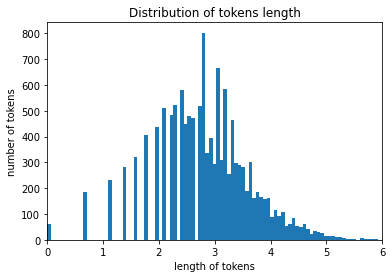

In [14]:
plt.hist(np.log(num_tokens), bins = 100)#有大有小取对数
plt.xlim((0,6))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
# plt.savefig(r'C:\Users\17433\Desktop\毕业设计\数据图\sunshi.png',dpi=1000,bbox_inches = 'tight')#保存图片
plt.savefig(r'C:\Users\17433\Desktop\毕业设计\数据图\正态分布.png',dpi=500)#保存图片
plt.show()

In [15]:
# 取tokens平均值并加上两个tokens的标准差，
# 假设tokens长度的分布为正态分布，则max_tokens这个值可以涵盖95%左右的样本
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens
print("max_tokens:", max_tokens)

77

max_tokens: 77


In [16]:
# 取tokens的长度为236时，大约95%的样本被涵盖
# 对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9589391998794545

In [17]:
# 用来将tokens转换为文本，定义由标签返回原文本的函数，方便Debug
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index_to_key[i]
        else:
            text = text + ' '
    return text

In [18]:
#测试函数
reverse = reverse_tokens(train_tokens[0])
print("train_tokens[0]:", train_tokens[0])
# 经过tokenize再恢复成文本
# 可见标点符号都没有了
reverse = reverse_tokens(train_tokens[0])
print("reverse:", reverse)
reverse

train_tokens[0]: [102, 2813, 1, 25, 818, 3, 227, 4, 93, 1143, 3, 8, 2340, 36, 356, 39, 0, 1, 818, 842, 1, 57, 562, 1, 2165, 35, 7141, 34, 3580]
reverse: 最满意的就是空间了特别是现在结婚了有小孩子这个车对 的空间利用的还是不错的发动机可以外观很时尚


'最满意的就是空间了特别是现在结婚了有小孩子这个车对 的空间利用的还是不错的发动机可以外观很时尚'

In [19]:
# 原始文本
train_texts_orig[0]

'最满意的就是空间了，特别是现在结婚了有小孩子，这个车对这方面的空间利用的还是不错的，发动机可以，外观很时尚，'

In [20]:
# 只使用前20000个词
num_words = 50000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))
print("embedding_matrix:", embedding_matrix)
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index_to_key[i]]
embedding_matrix = embedding_matrix.astype('float32')
print("embedding_matrix:", embedding_matrix)

embedding_matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
embedding_matrix: [[-8.017840e-01 -1.653400e-01  3.050800e-02 ...  1.065250e-01
   5.534360e-01  4.366500e-01]
 [-6.517470e-01  5.359700e-01  3.402710e-01 ...  8.053990e-01
   1.045930e-01  1.936940e-01]
 [-4.123210e-01  2.282610e-01  2.071140e-01 ...  8.087770e-01
   5.675100e-02  4.523740e-01]
 ...
 [ 5.849840e-01  1.121180e-01 -6.938330e-01 ... -3.760570e-01
   1.203500e-01 -1.059511e+00]
 [ 1.511710e-01 -3.200000e-04 -3.885760e-01 ... -5.988550e-01
   4.273530e-01 -3.922630e-01]
 [-4.536090e-01 -1.813600e-02 -1.306600e-01 ... -6.608000e-02
   3.566680e-01  3.898050e-01]]


In [21]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
np.sum(cn_model[cn_model.index_to_key[30]] == embedding_matrix[30])

300

In [22]:
# embedding_matrix的维度，
# 这个维度为keras的要求，后续会在模型中用到
print("embedding_matrix.shape", embedding_matrix.shape)

embedding_matrix.shape (50000, 300)


**padding（填充）和truncating（修剪）**  
我们把文本转换为tokens（索引）之后，每一串索引的长度并不相等，所以为了方便模型的训练我们需要把索引的长度标准化，上面我们选择了236这个可以涵盖95%训练样本的长度，接下来我们进行padding和truncating，我们一般采用'pre'的方法，这会在文本索引的前面填充0，因为根据一些研究资料中的实践，如果在文本索引后面填充0的话，会对模型造成一些不良影响。

In [23]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')
print("train_pad[33]:", train_pad[33])

train_pad[33]: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0   102  2813     1    25    36
   356     1   818     3   875 14456    34 20644    39    27   246     4
    34  4691     1   182    36   356     1  7141   936   692     0   624
    18    10   917  4335   956]


In [24]:
# 超出五万个词向量的词用0代替
train_pad[ train_pad>=num_words ] = 0

In [25]:
# 可见padding之后前面的tokens全变成0，文本在最后面
train_pad[33]
print("train_pad[33]", train_pad[33])

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,   102,  2813,
           1,    25,    36,   356,     1,   818,     3,   875, 14456,
          34, 20644,    39,    27,   246,     4,    34,  4691,     1,
         182,    36,   356,     1,  7141,   936,   692,     0,   624,
          18,    10,   917,  4335,   956])

train_pad[33] [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0   102  2813     1    25    36
   356     1   818     3   875 14456    34 20644    39    27   246     4
    34  4691     1   182    36   356     1  7141   936   692     0   624
    18    10   917  4335   956]


In [26]:
# 准备target向量，前400样本为1，后400为0
train_target = np.concatenate( (np.ones(6710),np.zeros(6563)) )
print(train_target)
print("train_target:", train_target)

[1. 1. 1. ... 0. 0. 0.]
train_target: [1. 1. 1. ... 0. 0. 0.]


In [27]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split

In [28]:
# 90%的样本用来训练，剩余10%用来测试
X_train, X_test, y_train, y_test = train_test_split(train_pad,train_target,test_size=0.1,random_state=22)

In [29]:
# 查看训练样本，确认无误
print(reverse_tokens(X_train[35]))
print('class: ',y_train[35])

                                                              尾部发出‘嗡嗡’‘突突’声严重影响了整车的 
class:  0.0


In [54]:
# 用LSTM对样本进行分类
model = Sequential()

In [55]:
# 模型第一层为embedding,trainable=False因为embedding_matrix下载后已经训练好了
model.add(Embedding(num_words,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))

In [56]:
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))#双向LSTM考虑前后词
#model.add(Dropout(0.1))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))#units=16神经元个数
model.add(Dropout(0.5))

In [57]:
# GRU的代码
# model.add(GRU(units=32, return_sequences=True))
# model.add(GRU(units=16, return_sequences=True))
# model.add(GRU(units=4, return_sequences=False))

In [58]:
#加入全连接层
model.add(Dense(1, activation='sigmoid'))
# 使用adam以0.001的learning rate进行优化
optimizer = adam.Adam(lr=1e-3)

In [59]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [60]:
# 我们来看一下模型的结构，一共90k左右可训练的变量，None表示batchsize,一个batch有236词输入
#15000000为50000*300，因为train=false,所以不训练这些参数
#17=16*1+1(bias为一参数)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 77, 300)           15000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 77, 128)           186880    
_________________________________________________________________
dropout_2 (Dropout)          (None, 77, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                9280      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 15,196,177
Trainable params: 196,177
Non-trainable params: 15,000,000
____________________________________

In [61]:
# 建立一个权重的存储点，verbose=1可以是打印信息更加详细，方面查找问题
path_checkpoint = 'sentiment_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)

In [62]:
# 尝试加载已训练模型
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [63]:
# 定义early stoping如果3个epoch内validation loss没有改善则停止训练
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [64]:
# 自动降低learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1, min_lr=1e-8, patience=0,
                                       verbose=1)

In [65]:
# 定义callback函数
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction,
    TensorBoard(log_dir=r'C:\Users\17433\毕设代码和数据\logs')
]
#tensorboard --logdir=C:\Users\17433\毕设代码和数据\logs

In [66]:
log_dir = r'C:\Users\17433\毕设代码和数据\logs'
if tf.gfile.Exists(log_dir):
    tf.gfile.DeleteRecursively(log_dir)

In [67]:
# 开始训练，4000*0.1=400为test，validation_split=0.1为3600*0.1
with tf.name_scope('train'):
    history=model.fit(X_train, y_train,
                      shuffle=True,
                      #validation_data=[X_test,y_test],
                      validation_split=0.15, 
                      epochs=10,
                      batch_size=64,
                      validation_freq=1,
                      callbacks=callbacks)

Train on 10153 samples, validate on 1792 samples
Epoch 1/10
10153/10153 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9962WARNING:tensorflow:From D:\Anaconda\envs\jupter1\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.

Epoch 00001: val_loss improved from inf to 0.01559, saving model to sentiment_checkpoint.keras
10153/10153 [==============================] - 33s 3ms/sample - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0156 - val_accuracy: 0.9939
Epoch 2/10
10153/10153 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9973
Epoch 00002: val_loss did not improve from 0.01559

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10153/10153 [==============

In [68]:
#评估模型误差和准确率
with tf.name_scope('test'):
    result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))
print(result)


Accuracy:99.77%
[0.011784308516117638, 0.997741]


In [69]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import roc_curve,auc
# from scipy import interp
# import numpy as np
# tprs=[]
# aucs=[]
# mean_fpr=np.linspace(0,1,100)
# i=0
# thresholds=0.5
# zhunquelu=[]
# #定义n折交叉验证
# KF = KFold(n_splits = 5,random_state=2022, shuffle=True)
# #data为数据集,利用KF.split划分训练集和测试集
# for train_index,test_index in KF.split(train_pad):
#     #建立模型，并对训练集进行测试，求出预测得分
#     #划分训练集和测试集
#     X_train,X_test = train_pad[train_index],train_pad[test_index]
#     y_train,y_test = train_target[train_index],train_target[test_index]
# #     #建立模型(模型已经定义)
# #     model = build_model()
# #     #编译模型
# #     model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['acc'])
#     #训练模型
#     model.fit(X_train, y_train,
#                       shuffle=True,
#                       #validation_data=[X_test,y_test],
#                       validation_split=0.15, 
#                       epochs=10,
#                       batch_size=128,
#                       validation_freq=1,
#                       callbacks=callbacks)
#     zhunquelu.append(model.evaluate(X_test, y_test)[1])
#     #利用model.predict获取测试集的预测值
#     y_pred = model.predict(X_test)
#     #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
#     fpr,tpr,thresholds=roc_curve(y_test,y_pred)
#     #interp:插值 把结果添加到tprs列表中 
#     tprs.append(interp(mean_fpr,fpr,tpr))
#     tprs[-1][0]=0.0
#     #计算auc
#     roc_auc=auc(fpr,tpr)
#     aucs.append(roc_auc)
#     #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
#     plt.plot(fpr,tpr,lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (i,roc_auc))
#     i +=1
# print(zhunquelu)
# # #绘制曲线
# # from sklearn import metrics
# # def show_roc(y_test, scores, pos_label):
# #     fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, pos_label=pos_label)

In [70]:
# #画对角线
# plt.plot([0,1],[0,1],linestyle='--',lw=2,color='r',label='Luck',alpha=.8)
# mean_tpr=np.mean(tprs,axis=0)
# mean_tpr[-1]=1.0
# mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
# std_auc=np.std(tprs,axis=0)
# plt.plot(mean_fpr,mean_tpr,color='b',label=r'Mean ROC (area=%0.2f)'%mean_auc,lw=2,alpha=.8)
# std_tpr=np.std(tprs,axis=0)
# tprs_upper=np.minimum(mean_tpr+std_tpr,1)
# tprs_lower=np.maximum(mean_tpr-std_tpr,0)
# plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
# plt.xlim([-0.05,1.05])
# plt.ylim([-0.05,1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.legend(loc='lower right')
# plt.show()    


In [71]:
#model.save('C:\Users\17433\Desktop\毕业设计\一些代码\model\model.h5')

In [72]:
sess = tf.compat.v1.disable_eager_execution()
# 所有的summary打包放在文件中
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(r'C:\Users\17433\毕设代码和数据\logs', tf.Session().graph)

print("history.history", history.history)

history.history {'loss': [0.0105420201633748, 0.006858248425292443, 0.00611923217876082, 0.0036202521733649786], 'accuracy': [0.9961588, 0.9973407, 0.99783313, 0.9987196], 'val_loss': [0.015594293150083363, 0.029507078940014253, 0.022009139343189026, 0.022136803757445835], 'val_accuracy': [0.9938616, 0.9927455, 0.9933036, 0.9933036], 'lr': [0.001, 0.001, 0.000100000005, 1.0000001e-05]}


In [73]:
def show_acc(history):
    # 绘制精度曲线
    plt.clf()
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(val_acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.savefig(r'C:\Users\17433\Desktop\毕业设计\数据图\jingdu.png',dpi=1000,bbox_inches = 'tight')#保存图片
    plt.show()

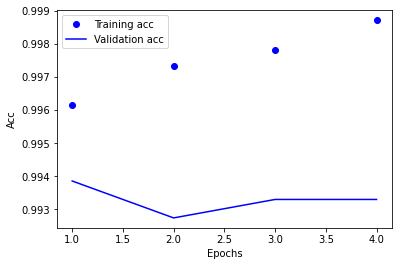

In [74]:
# show result
show_acc(history)

In [75]:
def show_loss(history):
    # 绘制损失曲线
    plt.clf()
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(val_loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(r'C:\Users\17433\Desktop\毕业设计\数据图\sunshi.png',dpi=1000,bbox_inches = 'tight')#保存图片
    plt.show()

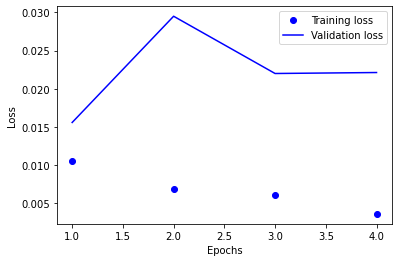

In [76]:
# show result
show_loss(history)

In [77]:
#使用模型，模拟实际使用场景，预测自定义的酒店评论文本
def predict_sentiment(text):
    # print(text)
    # 去标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",str(text))
    # 分词
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    # tokenize
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.key_to_index[word]
            if cut_list[i] >= 50000:
                cut_list[i] = 0
        except KeyError:
            cut_list[i] = 0
    # padding
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    # 预测
    result = model.predict(x=tokens_pad)
    
    coef = result[0][0]
    return coef


In [78]:
print(len(X_test))

1328


In [79]:
# import pandas as pd

# # test_read = pd.read_excel(r'/Users/17433/Desktop/毕业设计/新太平洋数据/广汽埃安数据.xlsx',sheet_name="测试数据")
# # text_list = list(test_read['info'])


# total = []
# for text in text_list:
#     total.append(predict_sentiment(text))
# print(total)

In [80]:
y_pred = model.predict(X_test)
y_pred = y_pred.T[0]
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)

In [81]:
y_actual = np.array(y_test)

In [82]:
# 找出错误分类的索引
misclassified = np.where( y_pred != y_actual )[0]

In [83]:
# 输出所有错误分类的索引，在test400条中有48条分错
misclassified
len(misclassified)
print(len(misclassified))

array([   0,  102, 1027], dtype=int64)

3

3


In [84]:
# 我们来找出错误分类的样本看看，misclassified[1]打出第二条分错的
idx=misclassified[1]
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])

                                                              这个价钱配置也就那样该买的时侯该有都有了
预测的分类 1
实际的分类 0.0


In [85]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix # 导入混淆矩阵的包
import seaborn as sns

In [86]:
# y_true= np.concatenate( (np.ones(319),np.zeros(1449)) )
# print(y_true)

In [87]:
#y_pre=np.array([1,0,1,1,0,1,0])
#print(y_pre)

In [88]:
threshold=0.5
y_pre_test=model.predict(X_test)
y_pre=np.int64(np.array(y_pre_test)>= threshold)#b是把预测值大于0.5的标为1，小于0.5的标为0
#print(b)

In [89]:
cm = confusion_matrix(y_test, y_pre)
cm 

array([[661,   3],
       [  0, 664]], dtype=int64)

In [90]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
(tn, fp, fn, tp)

(661, 3, 0, 664)

In [91]:
sns.set_style('white') # 设置全局的图的背景为白色
def show_cm(y_true, y_test):
    tn,fp,fn,tp = confusion_matrix(y_true,y_test ).ravel()
    #tn,fp,fn,tp = confusion_matrix(y_test ,y_true).ravel()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xticks([0,1],['1','0'])
    plt.yticks([0,1],['1','0'])
    plt.xlabel("Predict")
    plt.ylabel("True")

    plt.text(x=-0.1, y=0, s="TP:"+str(tp), color='white') # 设置文本，位置由x,y确定，x,y为相对位置。0-1
    plt.text(x=1-0.1, y=0, s="FN:"+str(fn), color='black')
    plt.text(x=0-0.1, y=1, s="FP:"+str(fp), color='black')
    plt.text(x=1-0.1, y=1, s="TN:"+str(tn), color='white')

    Precision = tp/(tp + fp)
    Recall= tp/(tp + fn)
    F1=(2*Precision*Recall)/(Precision+Recall)
    print("查准率:",Precision)
    print("召回率:",Recall)
    print("F1:",F1)
    plt.savefig(r'C:\Users\17433\Desktop\毕业设计\数据图\hunxiao.png',dpi=1000,bbox_inches = 'tight')#保存图片
    plt.show()

查准率: 0.9955022488755623
召回率: 1.0
F1: 0.9977460555972953


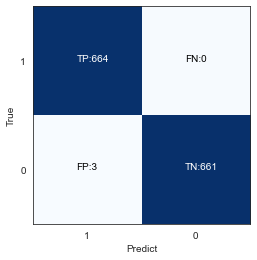

In [92]:
#绘图
show_cm(y_test, y_pre)

In [93]:
#绘制曲线
from sklearn import metrics
def show_roc(y_test, scores, pos_label):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, pos_label=pos_label)
    plt.plot(fpr, tpr, color='green')
    plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), color='red', ls='--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC ")
    plt.savefig(r'C:\Users\17433\Desktop\毕业设计\数据图\roc.png',dpi=1000,bbox_inches = 'tight')#保存图片
    plt.show()

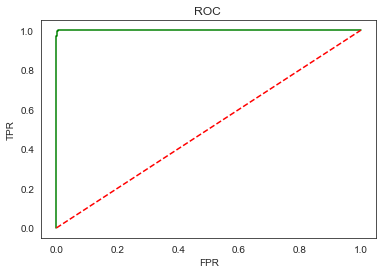

In [94]:
#绘制ROC曲线
show_roc(y_test,y_pre_test,1)